In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_text as pt
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#display all columns
pd.set_option('display.max_columns', None)

#display all row
pd.set_option('display.max_rows', None)

In [2]:
# create dataframe using .csv file provided
df_loans = pd.read_csv('D:\Dataset\IDX_Final_Project\loan_data_2007_2014.csv')

In [3]:
df_loans.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# Data Cleaning

In [5]:
# Drop unnecessary column
df_loans.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [6]:
# Separate categorical and numerical columns
col_cat = df_loans.select_dtypes(include='object').columns.to_list()
col_num = df_loans.select_dtypes(exclude='object').columns.to_list()

In [7]:
df_loans[col_cat].isna().sum()

term                        0
grade                       0
sub_grade                   0
emp_title               27588
emp_length              21008
home_ownership              0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
url                         0
desc                   340304
purpose                     0
title                      21
zip_code                    0
addr_state                  0
earliest_cr_line           29
initial_list_status         0
last_pymnt_d              376
next_pymnt_d           227214
last_credit_pull_d         42
application_type            0
dtype: int64

In [8]:
# check for missing values in categorical columns
col_cat_nalist = []
for col in df_loans[col_cat]:
    if df_loans[col_cat][col].isna().sum() > 0:
        col_cat_nalist.append(col)
print(f'Total missing columns: {len(col_cat_nalist)}\n{col_cat_nalist}')

Total missing columns: 8
['emp_title', 'emp_length', 'desc', 'title', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


#### There are a total of 8 categorical columns that have missing data:
- emp_title
- emp_length
- desc
- title
- earliest_cr_line
- last_pymnt_d
- next_pymnt_d
- last_credit_pull_d

In [9]:
df_loans[col_num].isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
annual_inc                          4
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_r

for col in col_num:
    if col_num[col].isna().sum() == col_num.shape[0]:
        col_num.drop(columns=col, axis=1, inplace=True)

In [10]:
# check for missing values in numerical columns
col_num_nalist = []
for col in df_loans[col_num]:
    if df_loans[col_num][col].isna().sum() > 0:
        col_num_nalist.append(col)
print(f'Total missing columns: {len(col_num_nalist)}\n{col_num_nalist}')

Total missing columns: 32
['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


#### There are a total of 32 numerical columns that have missing values:
- annual_inc
- delinq_2yrs
- inq_last_6mths
- mths_since_last_delinq
- mths_since_last_record
- open_acc
- pub_rec
- revol_util
- total_acc
- collections_12_mths_ex_med
- mths_since_last_major_derog
- annual_inc_joint
- dti_joint
- verification_status_joint
- acc_now_delinq
- tot_coll_amt
- tot_cur_bal
- open_acc_6m
- open_il_6m
- open_il_12m
- open_il_24m
- mths_since_rcnt_il
- total_bal_il
- il_util
- open_rv_12m
- open_rv_24m
- max_bal_bc
- all_util
- total_rev_hi_lim
- inq_fi
- total_cu_tl
- inq_last_12m

In [11]:
df_loans[col_num].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,466285.0,13079729.91,10893711.62,54734.00,3639987.00,10107897.00,20731209.00,38098114.00
member_id,466285.0,14597660.62,11682367.44,70473.00,4379705.00,11941075.00,23001541.00,40860827.00
loan_amnt,466285.0,14317.28,8286.51,500.00,8000.00,12000.00,20000.00,35000.00
funded_amnt,466285.0,14291.80,8274.37,500.00,8000.00,12000.00,20000.00,35000.00
funded_amnt_inv,466285.0,14222.33,8297.64,0.00,8000.00,12000.00,19950.00,35000.00
int_rate,466285.0,13.83,4.36,5.42,10.99,13.66,16.49,26.06
installment,466285.0,432.06,243.49,15.67,256.69,379.89,566.58,1409.99
annual_inc,466281.0,73277.38,54963.57,1896.00,45000.00,63000.00,88960.00,7500000.00
dti,466285.0,17.22,7.85,0.00,11.36,16.87,22.78,39.99
delinq_2yrs,466256.0,0.28,0.80,0.00,0.00,0.00,0.00,29.00


## Check for duplicate

In [12]:
# check for duplicate row
print(f'Total of duplicate rows: {df_loans.duplicated().sum()}')

Total of duplicate rows: 0


There is no duplicate in the dataset

## Checking for missing values

In [13]:
# assign number of missing values
df_na_val = df_loans.isna().sum()

# calculate percentage
df_naval_percentage = round(df_na_val/len(df_loans)*100,2)

# create new dataframe
df_naval_summ = pd.DataFrame({'Total_missing_values':df_na_val,
                             'Percentage_of_missing_values':df_naval_percentage})

df_naval_summ.sort_values('Percentage_of_missing_values', ascending=False, inplace=True)

# filter only with percentage >0
df_naval_summ_res = df_naval_summ[df_naval_summ['Percentage_of_missing_values']>0].reset_index()

df_naval_summ_res.rename(columns={'index':'Columns'}, inplace=True)

df_naval_summ_res

,Columns,Total_missing_values,Percentage_of_missing_values
0,inq_last_12m,466285,100.00
1,total_bal_il,466285,100.00
2,annual_inc_joint,466285,100.00
3,dti_joint,466285,100.00
4,verification_status_joint,466285,100.00
5,open_acc_6m,466285,100.00
6,open_il_12m,466285,100.00
7,open_il_24m,466285,100.00
8,mths_since_rcnt_il,466285,100.00
9,open_il_6m,466285,100.00


## Handling missing values

In [14]:
# drop column if percentage of missing values is >50
col_todrop = df_naval_summ[df_naval_summ['Percentage_of_missing_values']>50].index.tolist()

df_loans.drop(columns=col_todrop, axis=1, inplace=True)

In [15]:
df_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [16]:
# creating new df excluding dtypes object
col_numerical = df_loans.select_dtypes(exclude='object')
col_numerical.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1,0.0,NaN,NaN,NaN


In [17]:
# check and replacing numerical values with median
for col in col_numerical:
    na_col = col_numerical[col].isna().sum()
    if na_col>0:
        median = col_numerical[col].median()
        df_loans[col] = df_loans[col].fillna(median)
        
df_loans.isna().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             21
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                  29
inq_last_6mths                     0
o

In [18]:
# creating new df including dtypes object
col_categorical = df_loans.select_dtypes(include='object')
col_categorical.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL


In [19]:
# check and replacing categorical values with mode
for col in col_categorical:
    na_col=col_categorical[col].isna().sum()
    if na_col>0:
        mode = col_categorical[col].mode().loc[0]
        df_loans[col] = df_loans[col].fillna(mode)
        
df_loans.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

# Exploratory Data Analysis (EDA)

In [20]:
# Copy df_loans
df_loans2 = df_loans.copy()
df_loans2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Feb-16,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Feb-16,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [21]:
df_loans2['Target'] = df_loans2['loan_status'].apply(lambda x: 'Good loans' if x in ['Fully Paid', 'Current'] else 'Bad loans')

In [22]:
# Create Group for Target
df_target_grp = df_loans2.groupby(['Target']).agg(Client_cnt = ('id','count')).sort_values('Client_cnt', ascending=False)
df_target_grp.reset_index(inplace=True)

# calculate the percentage
df_target_grp['Percentage'] = round(df_target_grp['Client_cnt']/df_target_grp['Client_cnt'].sum()*100,2)

df_target_grp

,Target,Client_cnt,Percentage
0,Good loans,408965,87.71
1,Bad loans,57320,12.29


Text(0, 0.5, 'Percentage by Total Clients')

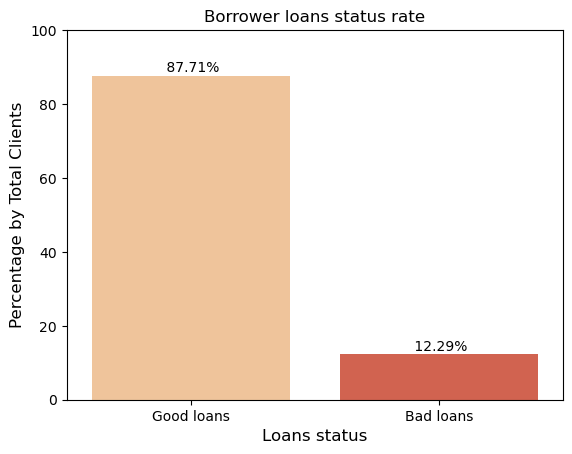

In [23]:
# Create barplot for Target
ax_diff = sns.barplot(x='Target', y='Percentage', data=df_target_grp, palette='OrRd')

pt.get_text(ax_diff,2,2)

# Formatting plot
plt.ylim(0, 100)

plt.title('Borrower loans status rate')
plt.xlabel('Loans status',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

## INSIGHT:
1. Borrower with good loans are considerably much higher in percentages reaching 87.71% than those with bad loans, indicating that the company as a lender has good loan product performance and also has good risk management and assessment.
2. 12.29% of borrower are in bad loans status, indicating that the company needs to study the characteristics of clients more deeply so that the company can identify early warning signs and implement mitigation for failed payments.

In [24]:
# Create Group for purpose
df_purpose_grp = df_loans2.groupby(['Target', 'purpose']).agg(Client_cnt = ('id','count')).sort_values('Client_cnt', ascending=False)
df_purpose_grp.reset_index(inplace=True)

# calculate the percentage
df_purpose_grp['Percentage'] = round(df_purpose_grp['Client_cnt']/df_purpose_grp['Client_cnt'].sum()*100,2)

df_purpose_grp

,Target,purpose,Client_cnt,Percentage
0,Good loans,debt_consolidation,239575,51.38
1,Good loans,credit_card,94061,20.17
2,Bad loans,debt_consolidation,34620,7.42
3,Good loans,home_improvement,23529,5.05
4,Good loans,other,19906,4.27
5,Bad loans,credit_card,10096,2.17
6,Good loans,major_purchase,8702,1.87
7,Good loans,small_business,5334,1.14
8,Good loans,car,4842,1.04
9,Good loans,medical,3910,0.84


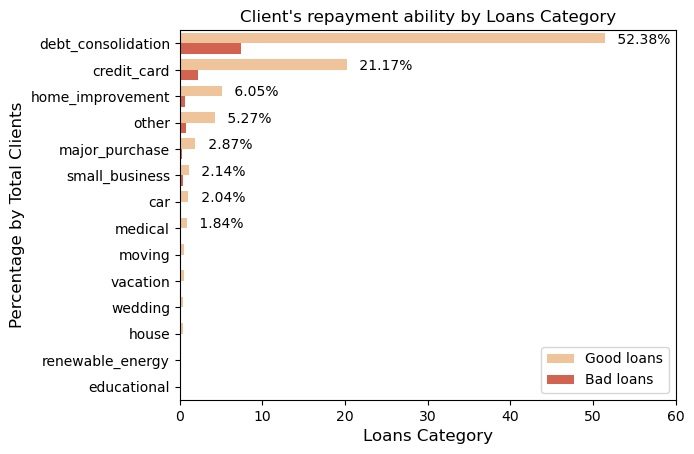

In [25]:
# Create barplot for purpose

ax_hbartype = sns.barplot(y='purpose', x='Percentage', hue='Target',data=df_purpose_grp, palette='OrRd', orient='horizontal')

pt.get_text_horz(ax_hbartype, 1, 8)

# Formatting plot
plt.xlim(0,60)
plt.legend(loc='lower right')
plt.title("Client's repayment ability by Loans Category")
plt.xlabel('Loans Category',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

plt.show()

## INSIGHT:
1. 52.38% of clients that do not have payment difficulty are in the loans category of debt consolidation, followed second by loans category credit card 21.17%.
2. Debt consolidation is when a client taking out a new loans to pay off other existing loans.
3. The reason why the majority of clients who do not have payment difficulty (52.38%) are in the loans category of debt consolidation is because debt consolidation generally comes with longer repayment terms compared to other category of loans. According to forbes.com, while on one side clients will have to pay interest for a longer period of time, on the other side it can reduce the monthly payment by a great amount.
4. The reason for the loans category credit card prevalence is because credit card loans typically have faster application processes and quicker approvals compared to debt consolidation loans which comes as more appealing for immediate needs or unexpected expenses.

In [26]:
# Create Group for grade
df_grade_grp = df_loans2.groupby(['Target', 'grade']).agg(Client_cnt = ('id','count')).sort_values('Client_cnt', ascending=False)
df_grade_grp.reset_index(inplace=True)

# calculate the percentage
df_grade_grp['Percentage'] = round(df_grade_grp['Client_cnt']/df_grade_grp['Client_cnt'].sum()*100,2)

df_grade_grp

,Target,grade,Client_cnt,Percentage
0,Good loans,B,124971,26.80
1,Good loans,C,109169,23.41
2,Good loans,A,71646,15.37
3,Good loans,D,63549,13.63
4,Good loans,E,27798,5.96
5,Bad loans,C,16124,3.46
6,Bad loans,D,13339,2.86
7,Bad loans,B,11958,2.56
8,Good loans,F,9624,2.06
9,Bad loans,E,7959,1.71


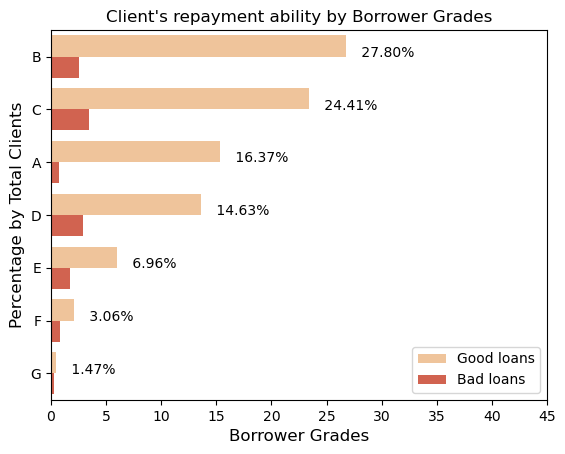

In [27]:
# Create barplot for grade

ax_hbartype_gr = sns.barplot(y='grade', x='Percentage', hue='Target',data=df_grade_grp, palette='OrRd', orient='horizontal')

pt.get_text_horz(ax_hbartype_gr, 1, 7)

# Formatting plot
plt.xlim(0,45)
plt.legend(loc='lower right')
plt.title("Client's repayment ability by Borrower Grades")
plt.xlabel('Borrower Grades',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

plt.show()

## INSIGHT:
- Grade B reaching 27.80% are the highest percentage of clients that do not have payment difficulty, followed second grade C having only a slight margin of 3.39%. This suggest that a significant portion of clients are relatively low-risk borrower, followed closely by a substantial number of moderate-risk borrowers.
- Grade A with 16.01% of clients that do not have payment difficulty suggest that quite a significant part of borrower are in the low-risk category while also having strong profiles and excellent credit histories.
- Grade D with 14.63% while having substantial amount of borrower that do not have payment difficulty, this would also means that company would have to take higher stake when lending to these high-risk borrower, according to consumerfinance.gov higher interest rate would be appropriate due to the perceived risk associated with lending to such borrowers.
- Grade D,E,F,G while having the lowest percentage, are also the high to the highest risk grade, the likelihood of borrower in these grades to default on loans are considered to be much higher than the rest of the grades, as such company need to be more strict when considering to accept loans application from such borrowers.

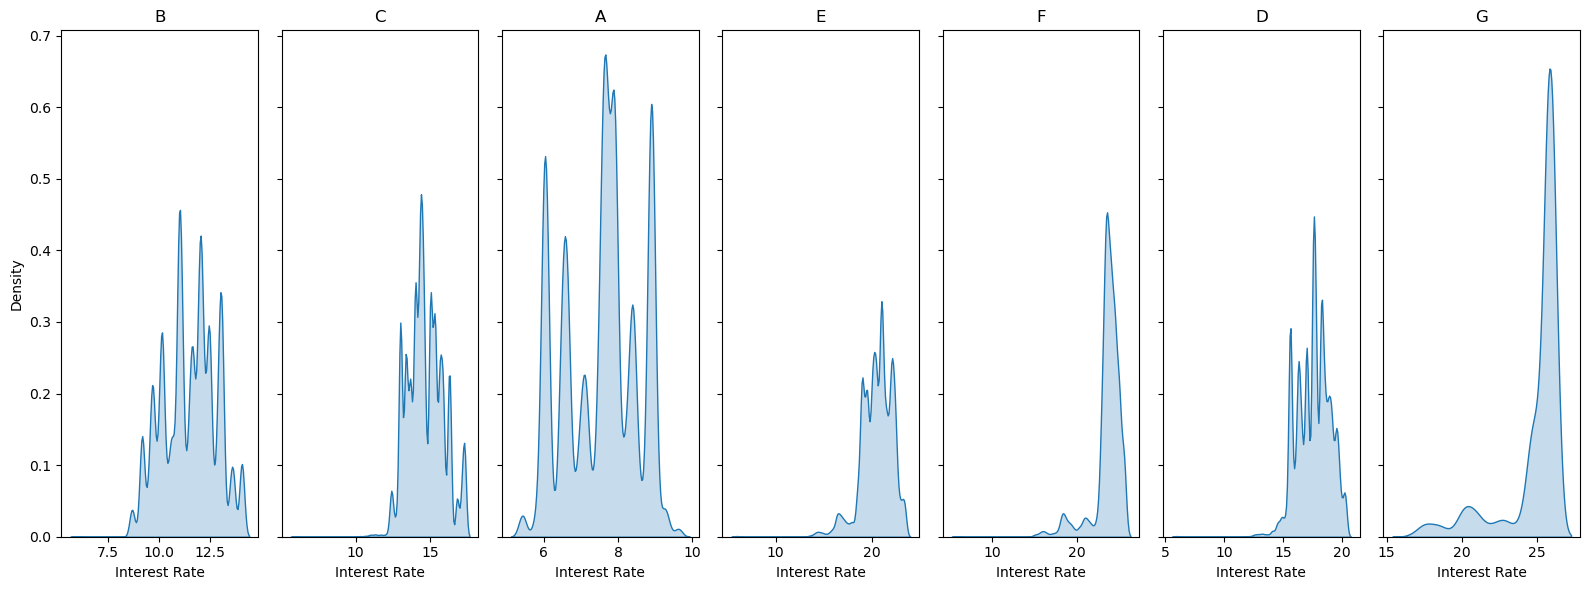

In [28]:
# getting unique values of column grade
categories = df_loans2['grade'].unique()
num_categories = len(categories)

# create subplot for all values in grade
fig, axes = plt.subplots(nrows=1, ncols=num_categories, figsize=(16, 6), sharey=True)
for i, category in enumerate(categories):
    sns.kdeplot(df_loans2[df_loans2['grade'] == category]['int_rate'], ax=axes[i], shade=True)
    axes[i].set_title(f'{category}')
    axes[i].set_xlabel('Interest Rate')
    if i == 0:
        axes[i].set_ylabel('Density')
    else:
        axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

- Most common occurrences of high-risk grade D, E, F, and G interest rates are in the range from 15% up-to 27%.
- This finding is inline with (Claessens et al., 2018) that loan grades are a key factor in deciding the interest rate a borrower gets offered. Higher grades borrower would more likely to get lower interest rates, while lower grades face higher borrowing costs.

In [29]:
# Create Group for term
df_term_grp = df_loans2.groupby(['Target', 'term']).agg(Client_cnt = ('id','count')).sort_values('Client_cnt', ascending=False)
df_term_grp.reset_index(inplace=True)

# calculate the percentage
df_term_grp['Percentage'] = round(df_term_grp['Client_cnt']/df_term_grp['Client_cnt'].sum()*100,2)

df_term_grp

,Target,term,Client_cnt,Percentage
0,Good loans,36 months,300606,64.47
1,Good loans,60 months,108359,23.24
2,Bad loans,36 months,37347,8.01
3,Bad loans,60 months,19973,4.28


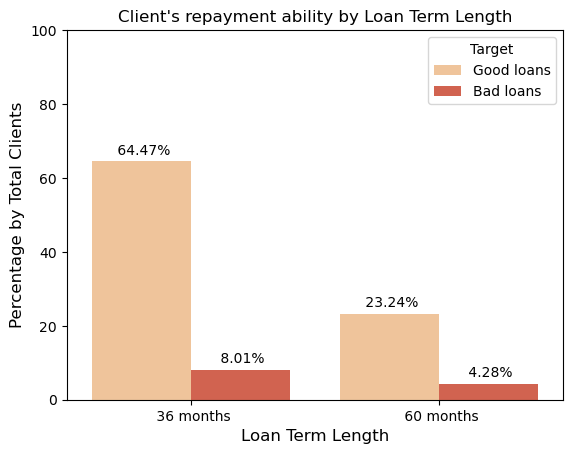

In [30]:
# Create barplot for term

ax_hbartype_trm = sns.barplot(y='Percentage', x='term', hue='Target',data=df_term_grp, palette='OrRd')

pt.get_text(ax_hbartype_trm,2,3)

# Formatting plot
plt.ylim(0,100)
plt.title("Client's repayment ability by Loan Term Length")
plt.xlabel('Loan Term Length',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

plt.show()

## INSIGHT:
1. 64.47% of borrower with good loans status are those who have 36 months of loan term, while the loan term of 60 months has 23.24% of borrower that are in good loans status.
2. Majority of borrower are in the loan term of 36 months, this suggest that there's lower chance of borrower to default because of the shorter term compared to 60 months, this would also suggest that the borrower who are in the 36 months loan term would be a fairly low-risk borrower.
3. Shorter term is more preferable amongs startups and small businesses, this is because newer businesses tend to have limited credit history and opt for shorter-term loans to build credit and access more favorable financing options in the future.

In [31]:
# Create Group for emp_length
df_emplen_grp = df_loans2.groupby(['Target', 'emp_length']).agg(Client_cnt = ('id','count')).sort_values('Client_cnt', ascending=False)
df_emplen_grp.reset_index(inplace=True)

# calculate the percentage
df_emplen_grp['Percentage'] = round(df_emplen_grp['Client_cnt']/df_emplen_grp['Client_cnt'].sum()*100,2)

df_emplen_grp

,Target,emp_length,Client_cnt,Percentage
0,Good loans,10+ years,151459,32.48
1,Good loans,2 years,36170,7.76
2,Good loans,3 years,32009,6.86
3,Good loans,< 1 year,31240,6.70
4,Good loans,5 years,26841,5.76
5,Good loans,1 year,25777,5.53
6,Good loans,4 years,24562,5.27
7,Good loans,7 years,22947,4.92
8,Good loans,6 years,22699,4.87
9,Good loans,8 years,19640,4.21


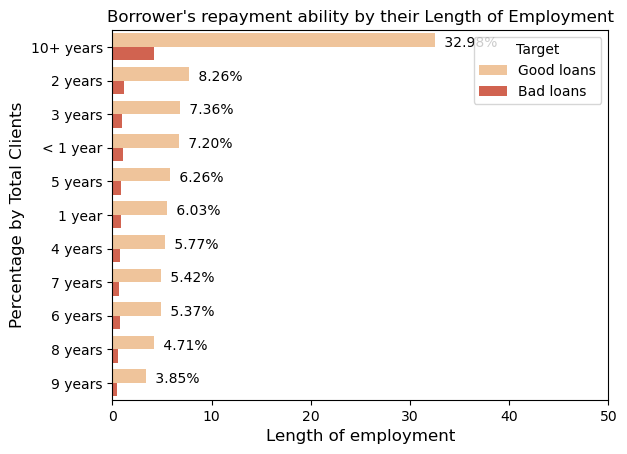

In [32]:
# Create barplot for emp_length

ax_hbartype_gr = sns.barplot(y='emp_length', x='Percentage', hue='Target',data=df_emplen_grp, palette='OrRd', orient='horizontal')

pt.get_text_horz(ax_hbartype_gr, 0.5, 11)

# Formatting plot
plt.xlim(0,50)
#plt.legend(loc='lower right')
plt.title("Borrower's repayment ability by their Length of Employment")
plt.xlabel("Length of employment",fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

plt.show()

## INSIGHT:
- 32.98% of borrower who have been employed for more than 10 years have the highest percentage of not having payment difficulty, far in comparison from the rest of the borrower employment range. This would suggest that significant portion of borrower are those who already have a stable source of income which in turn would leads to lower chances of default. This finding is inline with (Borsi, 2018) that borrowers with longer employment tenure tend to have a lower risk of default.
- The reason why borrower who are in the range of employment of more than 10 years in majority do not experience payment difficulty could be attributed to longer employment tenure typically would increase financial stability. Past credit history could also be one of the factor that would affect borrower confidence in taking out loans. 
- Borrower who have been employed for 2 years being in the second place with 8.26% who do not have payment difficulty could suggest that quite a substantial portion of borrower are in their early stages of their careers which are often tied to household matters such as starting families, and planning for major life events. These responsibilities could leads to the need of immediate funds or having quick access to funds.

In [33]:
# Create Group for emp_length

df_home_grp = df_loans2.groupby(['Target', 'home_ownership']).agg(Client_cnt = ('id','count')).sort_values('Client_cnt', ascending=False)
df_home_grp.reset_index(inplace=True)

# calculate the percentage
df_home_grp['Percentage'] = round(df_home_grp['Client_cnt']/df_home_grp['Client_cnt'].sum()*100,2)

df_home_grp

,Target,home_ownership,Client_cnt,Percentage
0,Good loans,MORTGAGE,210259,45.09
1,Good loans,RENT,161936,34.73
2,Good loans,OWN,36614,7.85
3,Bad loans,RENT,26537,5.69
4,Bad loans,MORTGAGE,25616,5.49
5,Bad loans,OWN,5090,1.09
6,Good loans,OTHER,117,0.03
7,Bad loans,OTHER,65,0.01
8,Good loans,NONE,38,0.01
9,Bad loans,NONE,12,0.00


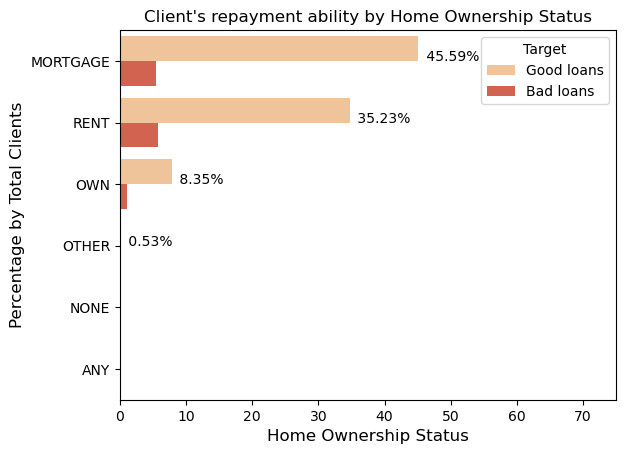

In [34]:
# Create barplot for home_ownership
ax_hbartype_gr = sns.barplot(y='home_ownership', x='Percentage', hue='Target',data=df_home_grp, palette='OrRd', orient='horizontal')

pt.get_text_horz(ax_hbartype_gr, 0.5, 4)

# Formatting plot
plt.xlim(0,75)
#plt.legend(loc='lower right')
plt.title("Client's repayment ability by Home Ownership Status")
plt.xlabel('Home Ownership Status',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

plt.show()

## INSIGHT:
- Mortgage reaching 27.80% are the highest percentage of clients that do not have payment difficulty, followed second Rent having quite an amount of margin by 10.36%. This suggest majority of borrower are those who are associated with greater financial stability while also highly susceptible to the likelihood of unforeseen financial challenges.
- 8.35% of borrower that do not have payment difficulty own a house, could mean that small portion of borrower have fully paid off their properties. This could also suggest that the borrower might be in the older side or closer to retirement which would potentially increase their risk of default.

In [35]:
# average interest rate
intrate_avg = round(df_loans2['int_rate'].mean(),2)

# average interest rate for good loans
intrate_nodiff = df_loans2[df_loans2['Target'] == 'Good Loans']
intrate_nodiff_avg = round(intrate_nodiff['int_rate'].mean(),2)

# average interest rate for bad loans
intrate_diff = df_loans2[df_loans2['Target'] == 'Bad loans']
intrate_diff_avg = round(intrate_diff['int_rate'].mean(),2)

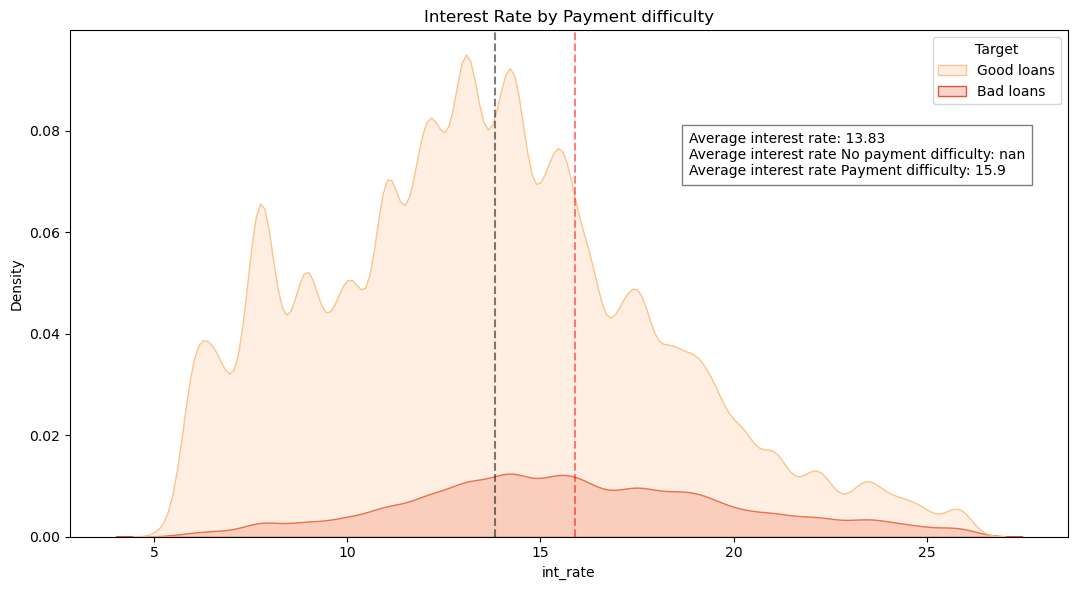

In [36]:
plt.figure(figsize=(11, 6))

# Kernel Density Estimation
sns.kdeplot(data=df_loans2, x='int_rate', hue='Target', palette='OrRd',fill=True)

# Add vertical lines for averages
for val, color in zip([intrate_avg, intrate_nodiff_avg, intrate_diff_avg], ['black', 'orange', 'red']):
    plt.axvline(val, color=color, linestyle='dashed', alpha=.5)

# Set the title
plt.title("Interest Rate by Payment difficulty")

# Create percentage labels
plt.text(0.62, 0.8, f"Average interest rate: {intrate_avg}\n"
         f"Average interest rate No payment difficulty: {intrate_nodiff_avg}\n"
         f"Average interest rate Payment difficulty: {intrate_diff_avg}",
         bbox=dict(facecolor='w', alpha=0.5, pad=5),
         transform=plt.gca().transAxes, ha="left", va="top")

plt.tight_layout()
plt.show()

Based on study done by Bankrate.com, in 2024 the average interest rates for personal loans is 12.10%, while those who has excellent credit score having the lowest interest rates of 10.73% - 12.50%. For borrower with good credit score, the average rate is 13.50% – 15.50%. Borrower with lower credit score will pay a considerably higher average rate possibly reaching 32%.

# Insight : 
- The average interest rate for all borrowers is 13.83%, this would suggest that it is still considered to be good because it's in the range of 12.50% – 15.50%
- The average interest rate for borrowers who do not experience payment difficulty is 13.54%, while for those who experience payment difficulty is 15.9%. The reason why the average interest rate for borrowers who experience payment difficulty is higher is that as a borrower's credit score gets lower, increasing the interest rate becomes a way to compensate for the increased risk the lender have to takes on.

# Feature Engineering

## Feature Selection
- Feature selection is a crucial step in machine learning. 
- Reducing the number of features can lead to simpler models, which are less prone to overfitting. 
- Overfitting occurs when a model performs well on the training data but fails to generalize to new, unseen data.

In [37]:
df_loans3 = df_loans2.copy()

# Convert Target values to 1 and 0
df_loans3['Target'] = df_loans3['Target'].apply(lambda x : 1 if x=='Good loans' else 0)

In [38]:
df_loans3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Target
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,1
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Feb-16,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,1
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Feb-16,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,1
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,1


In [39]:
# Assign x and y values
X = df_loans3.drop(columns='Target', axis=1)
y = df_loans3['Target']

In [40]:
y.value_counts()

Target
1    408965
0     57320
Name: count, dtype: int64

In [41]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((373028, 53), (93257, 53), (373028,), (93257,))

In [42]:
# check for any anomaly in data train
X_train['home_ownership'].value_counts()

home_ownership
MORTGAGE    188510
RENT        150904
OWN          33427
OTHER          146
NONE            41
Name: count, dtype: int64

In [43]:
# check for any anomaly in data test
X_test['home_ownership'].value_counts()

home_ownership
MORTGAGE    47365
RENT        37569
OWN          8277
OTHER          36
NONE            9
ANY             1
Name: count, dtype: int64

In [44]:
# because ANY isn't in X_train, ANY will be converted to OTHER because of possible same meaning
X_test['home_ownership'] = X_test['home_ownership'].apply(lambda x: 'OTHER' if x=='ANY' else x)

### Categorical Column Selection
Column selection criteria for categorical data:
- Low cardinality (unique)
- No null values
- p-value < 0.05

In [45]:
# Create new dataframe including column with dtypes 'object'
x_train_cat = X_train.select_dtypes(include='object')
x_train_cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [46]:
# we use chi-squared test because dataset shown that the distribution is not normal
chi_2 = {}

# do chi squared test
for col in x_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, x_train_cat[col]))
    chi_2.setdefault('Feature',[]).append(col)
    chi_2.setdefault('p-value',[]).append(round(p,8))
    
# create dataframe from previously created dictionary
df_chi_2 = pd.DataFrame(data=chi_2)

In [47]:
df_chi_2

,Feature,p-value
0,term,0.000000
1,grade,0.000000
2,sub_grade,0.000000
3,emp_title,0.000000
4,emp_length,0.000000
5,home_ownership,0.000000
6,verification_status,0.000000
7,issue_d,0.000000
8,loan_status,0.000000
9,pymnt_plan,0.028433


In [48]:
# extract unique values for categorical column
cat_unique = x_train_cat.describe().T.reset_index()

# rename column index to feature
cat_unique.rename(columns={'index':'Feature'}, inplace=True)

cat_unique

,Feature,count,unique,top,freq
0,term,373028,2,36 months,270741
1,grade,373028,7,B,109635
2,sub_grade,373028,35,B3,25277
3,emp_title,373028,169850,Teacher,26400
4,emp_length,373028,11,10+ years,136826
5,home_ownership,373028,5,MORTGAGE,188510
6,verification_status,373028,3,Verified,134373
7,issue_d,373028,91,Oct-14,30904
8,loan_status,373028,9,Current,179292
9,pymnt_plan,373028,2,n,373022


In [49]:
#merge the two dataset
merge_chi_2 = pd.merge(df_chi_2, cat_unique, on='Feature', how='inner').sort_values(by=['p-value', 'unique'])

merge_chi_2

,Feature,p-value,count,unique,top,freq
0,term,0.000000,373028,2,36 months,270741
16,initial_list_status,0.000000,373028,2,f,242321
6,verification_status,0.000000,373028,3,Verified,134373
5,home_ownership,0.000000,373028,5,MORTGAGE,188510
1,grade,0.000000,373028,7,B,109635
8,loan_status,0.000000,373028,9,Current,179292
4,emp_length,0.000000,373028,11,10+ years,136826
11,purpose,0.000000,373028,14,debt_consolidation,219363
2,sub_grade,0.000000,373028,35,B3,25277
14,addr_state,0.000000,373028,50,CA,57175


- Drop application_type, because they have p-value > 0.05.
- Drop sub_grade, addr_state, issue_d, last_pymnt_d, next_pymnt_d, last_credit_pull_d, earliest_cr_line, zip_code, title, emp_title, url, because they have too much unique value.

In [50]:
X_train['pymnt_plan'].value_counts()

pymnt_plan
n    373022
y         6
Name: count, dtype: int64

- Very high data imbalance
- Drop pymnt_plan because 1 variable has too much frequency compared to variable 2

In [51]:
sel_col = ['term','initial_list_status','verification_status','home_ownership','grade','loan_status','emp_length','purpose']

X_train[sel_col].head()

,term,initial_list_status,verification_status,home_ownership,grade,loan_status,emp_length,purpose
368898,60 months,w,Source Verified,RENT,D,Current,2 years,debt_consolidation
176719,36 months,f,Source Verified,RENT,D,Fully Paid,10+ years,credit_card
175445,36 months,f,Source Verified,RENT,B,Fully Paid,10+ years,debt_consolidation
148563,36 months,w,Verified,RENT,A,Fully Paid,6 years,debt_consolidation
5894,36 months,f,Verified,MORTGAGE,C,Fully Paid,4 years,debt_consolidation


### Numerical Column Selection
Column selection criteria for numerical data:
- No null values
- p-value < 0.05
- correlation coefficient <= 0.7

In [52]:
# Create new dataframe without column with dtypes 'object'
x_train_num = X_train.select_dtypes(exclude='object')
x_train_num.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [53]:
x_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373028 entries, 368898 to 186806
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          373028 non-null  int64  
 1   member_id                   373028 non-null  int64  
 2   loan_amnt                   373028 non-null  int64  
 3   funded_amnt                 373028 non-null  int64  
 4   funded_amnt_inv             373028 non-null  float64
 5   int_rate                    373028 non-null  float64
 6   installment                 373028 non-null  float64
 7   annual_inc                  373028 non-null  float64
 8   dti                         373028 non-null  float64
 9   delinq_2yrs                 373028 non-null  float64
 10  inq_last_6mths              373028 non-null  float64
 11  open_acc                    373028 non-null  float64
 12  pub_rec                     373028 non-null  float64
 13  revol_bal     

In [54]:
#Because our two arrays are incompatible dimensions(one dataset really big while others really small)
#We can't use Mann-Whitney or Kruskall Wallis
#So we use ANOVA or F-statistic
F_statistic, p_values = f_classif(x_train_num, y_train)

#create dataframe 
df_anova = pd.DataFrame(data= {'Numerical Feature':x_train_num.columns.values,
                                'p-value': p_values.round(5)})

df_anova.shape

(32, 2)

In [55]:
df_anova

,Numerical Feature,p-value
0,id,0.00000
1,member_id,0.00000
2,loan_amnt,0.00002
3,funded_amnt,0.00023
4,funded_amnt_inv,0.59423
5,int_rate,0.00000
6,installment,0.00000
7,annual_inc,0.00000
8,dti,0.00000
9,delinq_2yrs,0.00042


In [56]:
#filter only column that has p-value < 0.05
temp_num_cols = df_anova[df_anova['p-value']<0.05]['Numerical Feature'].tolist()

print(f'Number of excluded columns: {len(df_anova)-len(temp_num_cols)}')

temp_num_cols

Number of excluded columns: 3


['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

<Axes: >

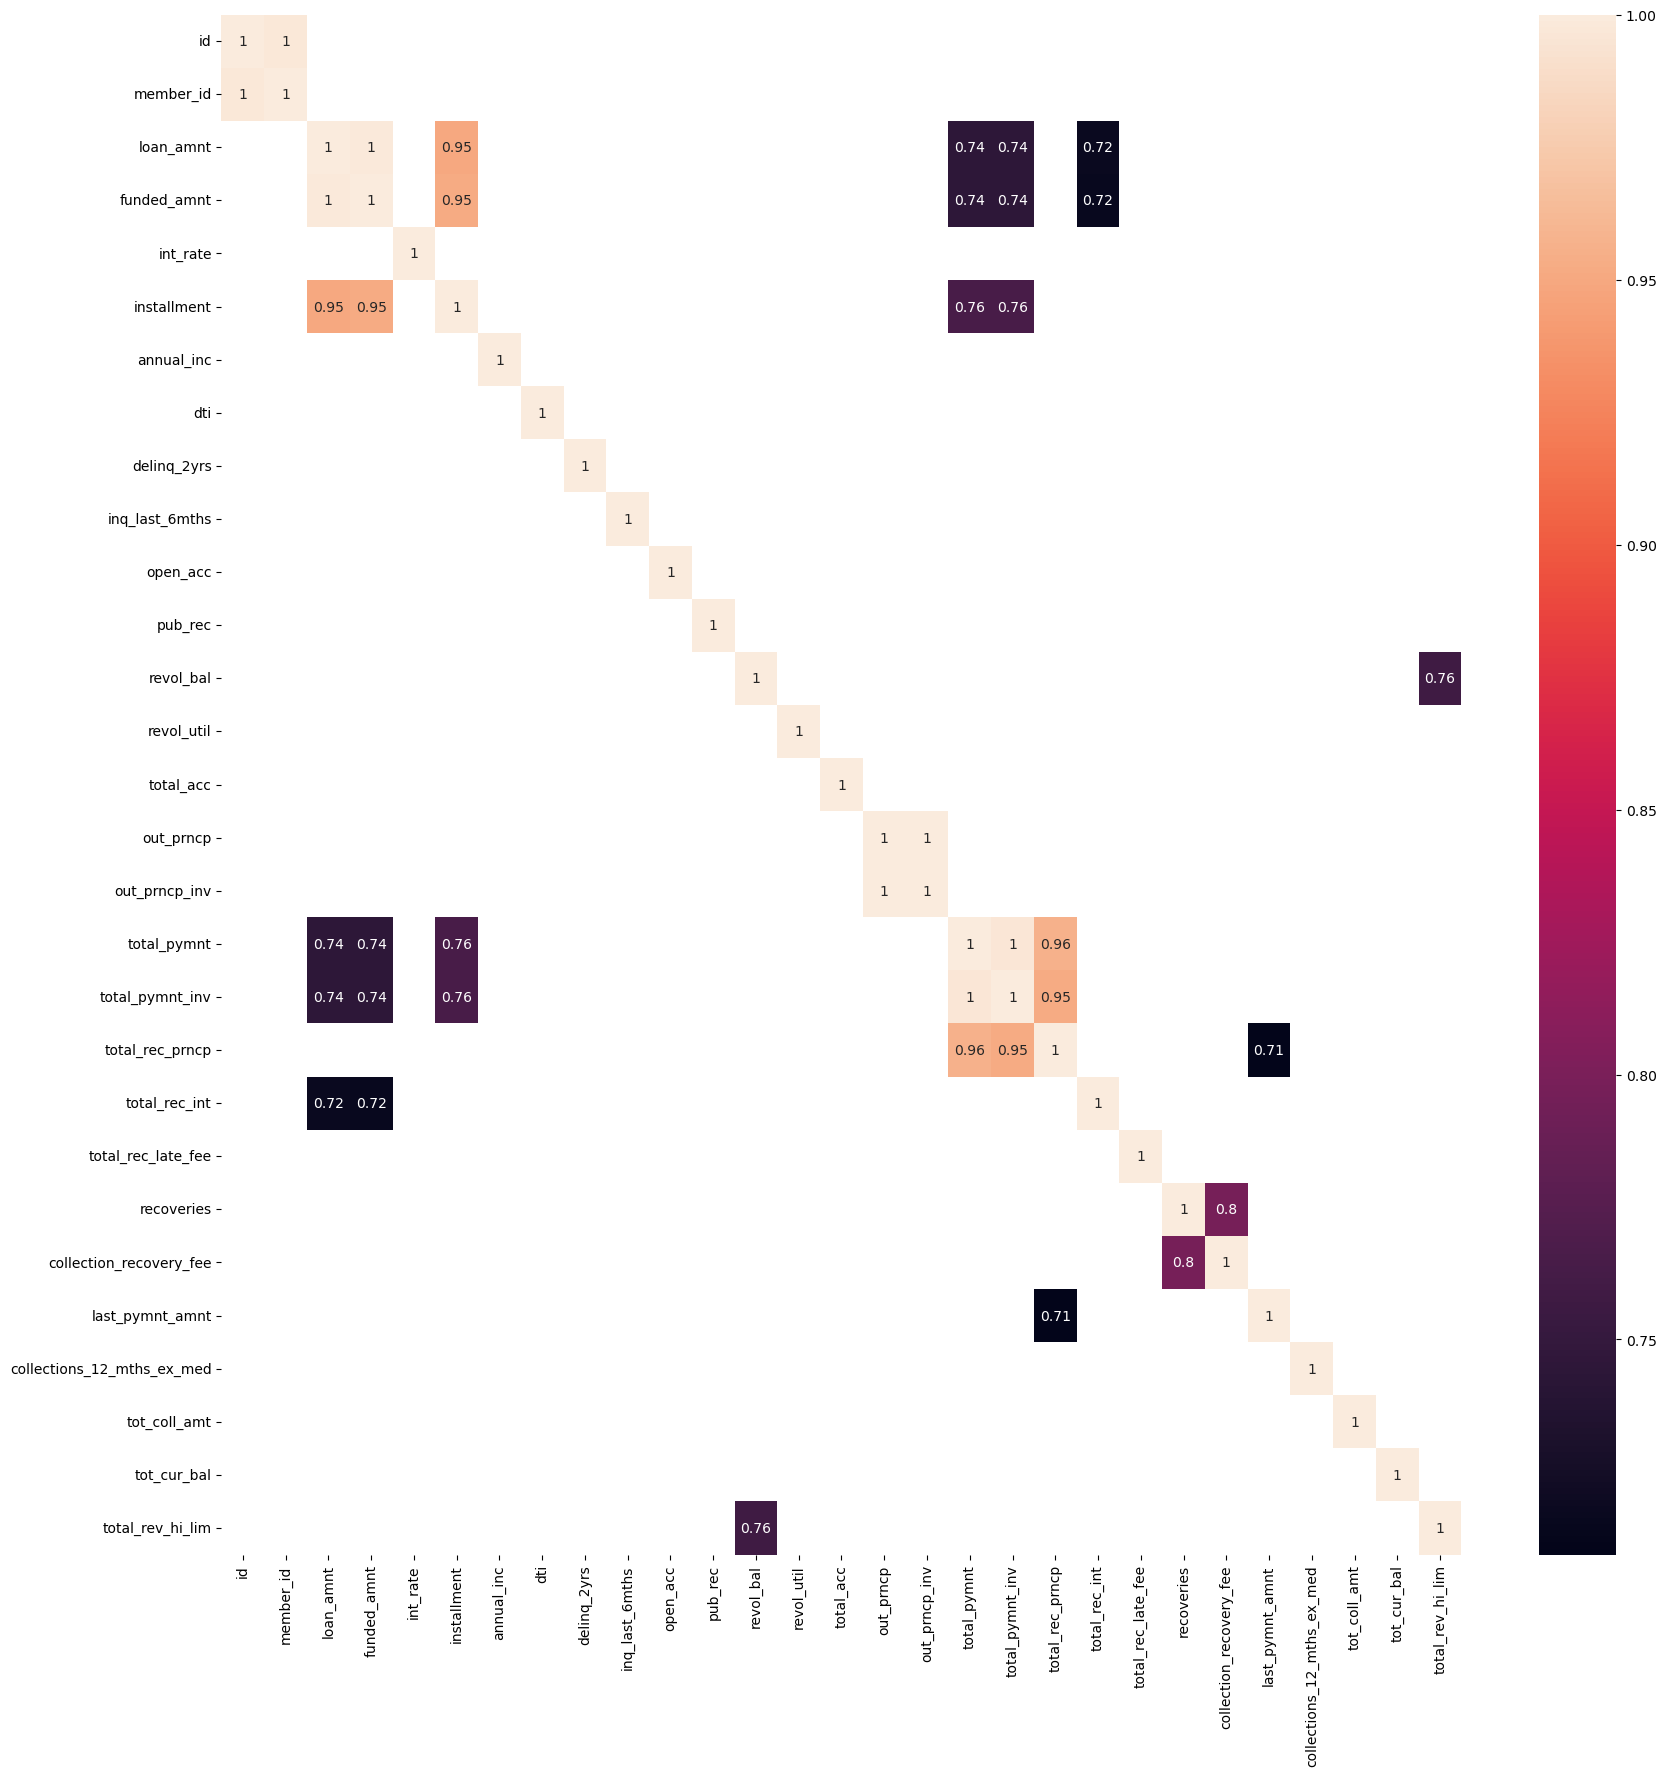

In [57]:
#select only the columns with correlation < 0.7
corr = X_train[temp_num_cols].corr()
fig = plt.figure(figsize=(20,20))

# create heatmap to show correlation between features
sns.heatmap(corr, annot=True, mask=(abs(corr)<=0.7))

In [58]:
#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype = bool), k=1))

In [59]:
corr_selected_col = [col for col in mask.columns if any (mask[col] < 0.7)]

print(f'Number of excluded columns: {len(temp_num_cols)-len(corr_selected_col)}')

corr_selected_col

Number of excluded columns: 2


['loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

### Combine Selected Columns

In [60]:
#combine selected categorical & numerical
selected_col = sel_col + corr_selected_col
selected_col

['term',
 'initial_list_status',
 'verification_status',
 'home_ownership',
 'grade',
 'loan_status',
 'emp_length',
 'purpose',
 'loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [61]:
X_train_final = X_train[selected_col]
X_test_final = X_test[selected_col]

In [62]:
X_train_final.isnull().sum()

term                          0
initial_list_status           0
verification_status           0
home_ownership                0
grade                         0
loan_status                   0
emp_length                    0
purpose                       0
loan_amnt                     0
funded_amnt                   0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collecti

In [63]:
X_train_final.head()

,term,initial_list_status,verification_status,home_ownership,grade,loan_status,emp_length,purpose,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
368898,60 months,w,Source Verified,RENT,D,Current,2 years,debt_consolidation,11000,11000,15.61,265.23,55000.0,14.97,0.0,1.0,12.0,0.0,8880,88.8,23.0,8386.57,8386.57,5039.370000,5039.37,2613.43,2425.94,0.0,0.0,0.0,265.23,0.0,0.0,81554.0,10000.0
176719,36 months,f,Source Verified,RENT,D,Fully Paid,10+ years,credit_card,6000,6000,17.77,216.23,95000.0,2.91,0.0,3.0,5.0,1.0,4756,78.0,10.0,0.00,0.00,7771.689012,7771.69,6000.00,1771.69,0.0,0.0,0.0,854.02,0.0,0.0,26332.0,6100.0
175445,36 months,f,Source Verified,RENT,B,Fully Paid,10+ years,debt_consolidation,15000,15000,12.12,499.08,77000.0,27.10,0.0,2.0,10.0,0.0,42867,72.7,22.0,0.00,0.00,17159.285140,17159.29,15000.00,2159.29,0.0,0.0,0.0,8677.01,0.0,0.0,72864.0,59000.0
148563,36 months,w,Verified,RENT,A,Fully Paid,6 years,debt_consolidation,20000,20000,8.90,635.07,100000.0,20.00,0.0,0.0,12.0,0.0,21374,72.9,26.0,0.00,0.00,22690.040000,22690.04,20000.00,2690.04,0.0,0.0,0.0,6178.22,0.0,0.0,29270.0,29300.0
5894,36 months,f,Verified,MORTGAGE,C,Fully Paid,4 years,debt_consolidation,24000,24000,13.49,814.34,125000.0,21.48,0.0,0.0,9.0,0.0,6506,65.1,34.0,0.00,0.00,27191.690000,26908.42,24000.00,3191.69,0.0,0.0,0.0,16616.81,0.0,0.0,81539.0,22800.0


In [64]:
X_test_final.isnull().sum()

term                          0
initial_list_status           0
verification_status           0
home_ownership                0
grade                         0
loan_status                   0
emp_length                    0
purpose                       0
loan_amnt                     0
funded_amnt                   0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collecti

## Feature Encoding

### Label Encoding
- Label encoding is typically done on categorical columns with 2 or less unique values.
- Benefit in using label encoding is that it’s quick, and doesn’t add any new features in the way that one-hot encoding does.

In [65]:
# with categorical columns that have <=2 unique values
temp_col_list = []
for col in X_train_final.columns:
    if X_train_final[col].dtype == 'object' and X_train_final[col].nunique() <= 2:
        temp_col_list.append(col)
        # Create an instance of LabelEncoder
        label_encoder = LabelEncoder()
        # Fit on the training data and transform both the training and testing data
        X_train_final[col] = label_encoder.fit_transform(X_train_final[col])
        X_test_final[col] = label_encoder.transform(X_test_final[col])

# Display the first few rows of the transformed datasets
print(f'Number of encoded features: {len(temp_col_list)}')
print(f'Encoded features: {temp_col_list}')

Number of encoded features: 2
Encoded features: ['term', 'initial_list_status']


### One Hot Encoding
- One hot encoding create new feature for every unique values inside a column, or by creating dummies features.
- Categorical features are mapped with boolean values (True) & (False)
- 0 represents the absence, and 1 represents the presence of that particular category.

In [66]:
train_cat_col = X_train_final.select_dtypes(include='object').columns.to_list()
train_cat_col

['verification_status',
 'home_ownership',
 'grade',
 'loan_status',
 'emp_length',
 'purpose']

In [67]:
#pd.get_dummies is used for one-hot encoding categorical variables.
def create_dummy(df, col):
    dummy = pd.get_dummies(df[col], prefix_sep = ':')
    df = pd.concat([df, dummy], axis=1)
    return df

In [68]:
#create dummy for categorical
X_train_final = create_dummy(X_train_final, train_cat_col)
X_test_final = create_dummy(X_test_final, train_cat_col)

In [69]:
X_train_final.head()

,term,initial_list_status,verification_status,home_ownership,grade,loan_status,emp_length,purpose,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),emp_length:1 year,emp_length:10+ years,emp_length:2 years,emp_length:3 years,emp_length:4 years,emp_length:5 years,emp_length:6 years,emp_length:7 years,emp_length:8 years,emp_length:9 years,emp_length:< 1 year,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding
368898,1,1,Source Verified,RENT,D,Current,2 years,debt_consolidation,11000,11000,15.61,265.23,55000.0,14.97,0.0,1.0,12.0,0.0,8880,88.8,23.0,8386.57,8386.57,5039.370000,5039.37,2613.43,2425.94,0.0,0.0,0.0,265.23,0.0,0.0,81554.0,10000.0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
176719,0,0,Source Verified,RENT,D,Fully Paid,10+ years,credit_card,6000,6000,17.77,216.23,95000.0,2.91,0.0,3.0,5.0,1.0,4756,78.0,10.0,0.00,0.00,7771.689012,7771.69,6000.00,1771.69,0.0,0.0,0.0,854.02,0.0,0.0,26332.0,6100.0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
175445,0,0,Source Verified,RENT,B,Fully Paid,10+ years,debt_consolidation,15000,15000,12.12,499.08,77000.0,27.10,0.0,2.0,10.0,0.0,42867,72.7,22.0,0.00,0.00,17159.285140,17159.29,15000.00,2159.29,0.0,0.0,0.0,8677.01,0.0,0.0,72864.0,59000.0,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
148563,0,1,Verified,RENT,A,Fully Paid,6 years,debt_consolidation,20000,20000,8.90,635.07,100000.0,20.00,0.0,0.0,12.0,0.0,21374,72.9,26.0,0.00,0.00,22690.040000,22690.04,20000.00,2690.04,0.0,0.0,0.0,6178.22,0.0,0.0,29270.0,29300.0,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5894,0,0,Verified,MORTGAGE,C,Fully Paid,4 years,debt_consolidation,24000,24000,13.49,814.34,125000.0,21.48,0.0,0.0,9.0,0.0,6506,65.1,34.0,0.00,0.00,27191.690000,26908.42,24000.00,3191.69,0.0,0.0,0.0,16616.81,0.0,0.0,81539.0,22800.0,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,

In [70]:
X_train_final.shape, X_test_final.shape, y_train.shape, y_test.shape

((373028, 84), (93257, 84), (373028,), (93257,))

In [71]:
for col in sel_col:
    print(col)
    X_train_final.drop(columns=[col], axis=1, inplace=True)
    X_test_final.drop(columns=[col], axis=1, inplace=True)

term
initial_list_status
verification_status
home_ownership
grade
loan_status
emp_length
purpose


In [72]:
X_train_final.shape, X_test_final.shape, y_train.shape, y_test.shape

((373028, 76), (93257, 76), (373028,), (93257,))

# Modelling

## SMOTE
- Oversampling technique that helps to improve the performance of machine learning models by balancing the class distribution, particularly useful when the minority class is underrepresented.
- SMOTE works by creating synthetic examples from the minority class by interpolating between existing minority class instances.

In [73]:
#handle imbalance target using SMOTE
smt = SMOTE(random_state =2)
smt.fit(X_train_final, y_train)
X_smote, y_smote = smt.fit_resample(X_train_final, y_train)

#display row and column for data smote & data test
X_smote.shape, X_test_final.shape, y_smote.shape, y_test.shape
#AUC - ROC curve is a performance measurement for the classification problems at various threshold settings

((654344, 76), (93257, 76), (654344,), (93257,))

## Logistic Regression

In [74]:
model = LogisticRegression()

model.fit(X_smote, y_smote)

y_pred_proba_train = model.predict_proba(X_train_final)[:][:,1]
y_pred_proba_test = model.predict_proba(X_test_final)[:][:,1]

print('AUC train probability: ', roc_auc_score(y_true= y_train , y_score= y_pred_proba_train))
print('AUC test probability: ', roc_auc_score(y_true= y_test , y_score= y_pred_proba_test))

AUC train probability:  0.934251298058029
AUC test probability:  0.9343128022470626


#### Notes:
- AUC (Area Under Curve) according to (Narkhede, 2018) is a performance measurement or metric used to evaluate the performance of classification models.
- Higher AUC value indicates better class separation, as the model is able to distinguish between the positive and negative classes more effectively.
- AUC > 0.8: Generally is considered a good performance.
- AUC > 0.9: Is considered a very good performance.
- AUC < 0.5: Indicates the model performs no better than random.

#### Insight:
- 0.9 AUC score from both train & test probability suggest that the model performance considered to be very good, and is effective at distinguishing between the positive and negative classes.

In [75]:
y_pred_class = []

for val in y_pred_proba_test:
    if val > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

print(classification_report(y_true = y_test, y_pred= y_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81     11464
           1       0.97      0.98      0.98     81793

    accuracy                           0.96     93257
   macro avg       0.91      0.88      0.89     93257
weighted avg       0.95      0.96      0.96     93257



#### Insight:
- Out of all the loan statuses predicted, the model is able to predict that a client will not have payment difficulty with 97% prediction correct most of the time.
- Recall values of 98% indicates that the model is able to correctly identify 98% of the clients who do not have payment difficulty.
- F-1 score of 97% indicates that teh model has a good balance between precision and recall for both classes and is effective at classifying both cases of payment difficulty and no payment difficulty.

#### Confusion Matrix

In [76]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_class)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 8821  2643]
 [ 1451 80342]]


#### Insight:
- **positive class** can be calculated using values from the first column, which are 8873 + 2016 = 10,889.
- **negative class** can be calculated using values from the second column, which are 79777 + 2591 = 82,363.
- **True positive class** have the value of 8873, this represent that out of all prediction done by the model, only 8873 correctly predicted as positive.
- **True negative class** have the value of 79777, this represent that out of all prediction done by the model, only 79777 correctly predicted as negative.
- **False class** of positive and negative respectively has the values of 2016 and 2591. This values represent the number of prediction the model falsely predicted.

In [77]:
Y_test_pred = model.predict(X_test_final)

#Evaluasi akurasi model dengan set test
testD_accuracy = accuracy_score(y_test, Y_test_pred)
print(f'df_train Test accuracy: {testD_accuracy:.4f}')

df_train Test accuracy: 0.9561


# Hypertuning

In [78]:
#Membuat dictionary jarak nilai parameter C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#Membuat LogisticRegression
model = LogisticRegression()

#Melakukan gridsearch
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_smote, y_smote)

#Assign value terbaik C
best_C = grid_search.best_params_['C']

#Membuat model baru dengan param C
new_model = LogisticRegression(C=best_C)

print(f'C used: {best_C}')

C used: 10


In [79]:
#Latih model
new_model.fit(X_smote, y_smote)

y_pred_proba_train_hyp = new_model.predict_proba(X_smote)[:][:,1]
y_pred_proba_test_hyp = new_model.predict_proba(X_test_final)[:][:,1]

#AUC - ROC curve is a performance measurement for the classification problems at various threshold settings
print('AUC train probability: ', roc_auc_score(y_true= y_smote , y_score= y_pred_proba_train_hyp))
print('AUC test probability: ', roc_auc_score(y_true= y_test , y_score= y_pred_proba_test_hyp))

AUC train probability:  0.9510136349675242
AUC test probability:  0.9342570302549791


In [80]:
y_pred_class_hyp = []

for val in y_pred_proba_test_hyp:
    if val > 0.5:
        y_pred_class_hyp.append(1)
    else:
        y_pred_class_hyp.append(0)

print(classification_report(y_true = y_test, y_pred= y_pred_class_hyp))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81     11464
           1       0.97      0.98      0.98     81793

    accuracy                           0.96     93257
   macro avg       0.91      0.88      0.89     93257
weighted avg       0.95      0.96      0.96     93257



In [81]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_class_hyp)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 8814  2650]
 [ 1417 80376]]


In [82]:
#Prediksi model
Y_test_pred_hyp = new_model.predict(X_test_final)

#Evaluasi akurasi model dengan set test
testD_accuracy = accuracy_score(y_test, Y_test_pred_hyp)
print(f'df_train Test accuracy: {testD_accuracy:.4f}')

df_train Test accuracy: 0.9564


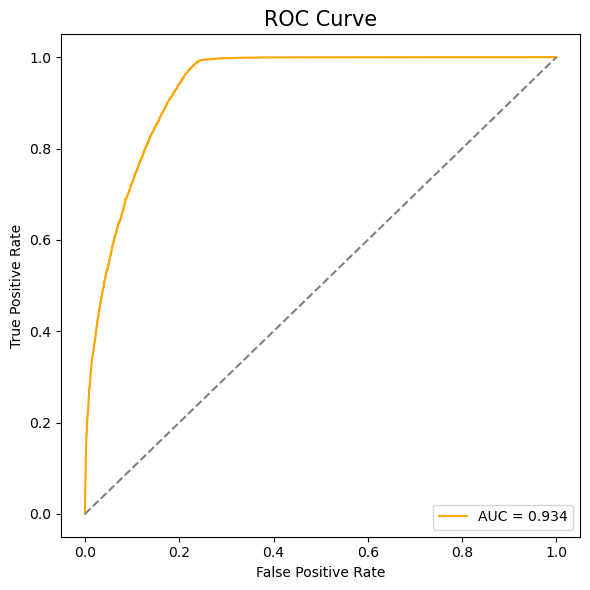

In [83]:
#false & true positive rate
fpr, tpr, tr = roc_curve(y_true= y_test, y_score= y_pred_proba_test_hyp)

#roc auc score
auc = roc_auc_score(y_true= y_test, y_score= y_pred_proba_test_hyp)

#plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr, label= f'AUC = {auc:.3f}', color='orange')
plt.plot(fpr,fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()
plt.tight_layout()

#### Insight:
- The ROC AUC score is the area under the ROC curve. It tells how well a model can produce relative scores to discriminate between positive class and negative class instances across all classification thresholds. 
- The ROC AUC score ranges from 0 to 1, where 0.5 indicates random guessing, and 1 indicates perfect performance.
- AUC score = 0.934 indicates that the model has a good performance.

In [84]:
coeff = new_model.coef_[0]  # Get coefficients from your model

# Calculate scores for each data point and rescale them
X_smote_scored = X_smote.apply(lambda x: x * coeff, axis=1)  # Calculate dot product with coefficients
X_smote_scored['Credit_Score'] = X_smote_scored.sum(axis=1)  # Sum the product for each data point (overall score)

factor = 20 / np.log(2)
offset = 600 - (factor * sum(coeff))
min_score = 300
max_score = 850

X_smote_scored['Score'] = ((X_smote_scored['Credit_Score'] - offset) / factor) * (max_score - min_score) + min_score

# Calculate probability of default
PDO = 20
X_smote_scored['Probability_of_default'] = 1 / (1 + np.exp(X_smote_scored['Credit_Score'] / PDO))

In [85]:
result_df = pd.DataFrame({
    'Credit_Score': X_smote_scored['Credit_Score'],
    'Probability_of_default': X_smote_scored['Probability_of_default'],
    'Interest_Rate': X_smote['int_rate']  # Access original interest rate values
})

result_df['Probability_of_default'] = round(result_df['Probability_of_default']*100,2)

In [87]:
result_df.head()

,Credit_Score,Probability_of_default,Interest_Rate
0,0.311218,49.61,15.61
1,1.538038,48.08,17.77
2,5.512244,43.15,12.12
3,5.146226,43.60,8.90
4,9.139598,38.77,13.49


In [88]:
result_df['int_range'] = pd.cut(result_df['Interest_Rate'], bins=np.linspace(5, 27, num=10).round(2))
result_df.reset_index(inplace=True)

In [90]:
result_df_grp = result_df.groupby(['int_range']).agg(prob_mean = ('Probability_of_default', 'mean')).sort_values('prob_mean', ascending=False)
result_df_grp.reset_index(inplace=True)

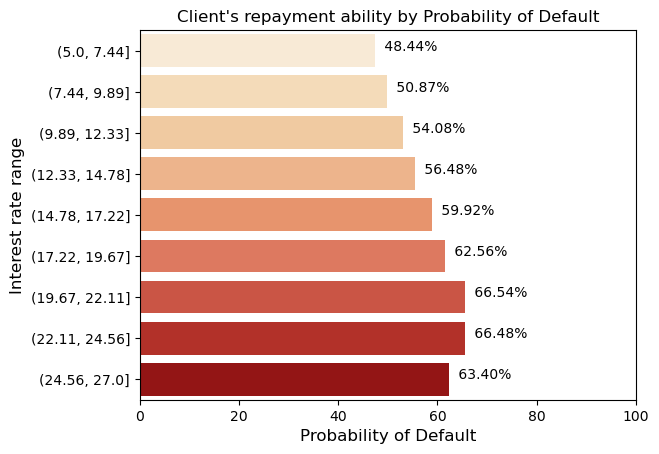

In [91]:
ax_barprob = sns.barplot(y='int_range', x='prob_mean',data=result_df_grp, palette='OrRd', orient='horizontal')

pt.get_text_horz(ax_barprob, 1, 9)

plt.xlim(0,100)
plt.title("Client's repayment ability by Probability of Default")
plt.xlabel('Probability of Default',fontsize=12)
plt.ylabel('Interest rate range',fontsize=12)

plt.show()

### Insight:
- Borrower whose interest rate in the range of 19.67% - 24.56% have the highest probability to default. This would suggest that based on their previous credit history and the resulted interest rate given to them, company can expect that there is 66.48% probability at most that the loans will be defaulted.
- Even at the lowest interest rate recorded which is in the range of 5% – 7.44%, the probability of loans defaulted is quite high reaching 48.44%. This would suggest that the company need strengthen the criteria needed for borrower loans application to be accepted.
- The result also suggest the need of risk mitigation plan by the company that would counter potential loss.